[Creating a Data Warehouse Through Joins and Unions](https://www.cloudskillsboost.google/focuses/3640?locale=en&parent=catalog)

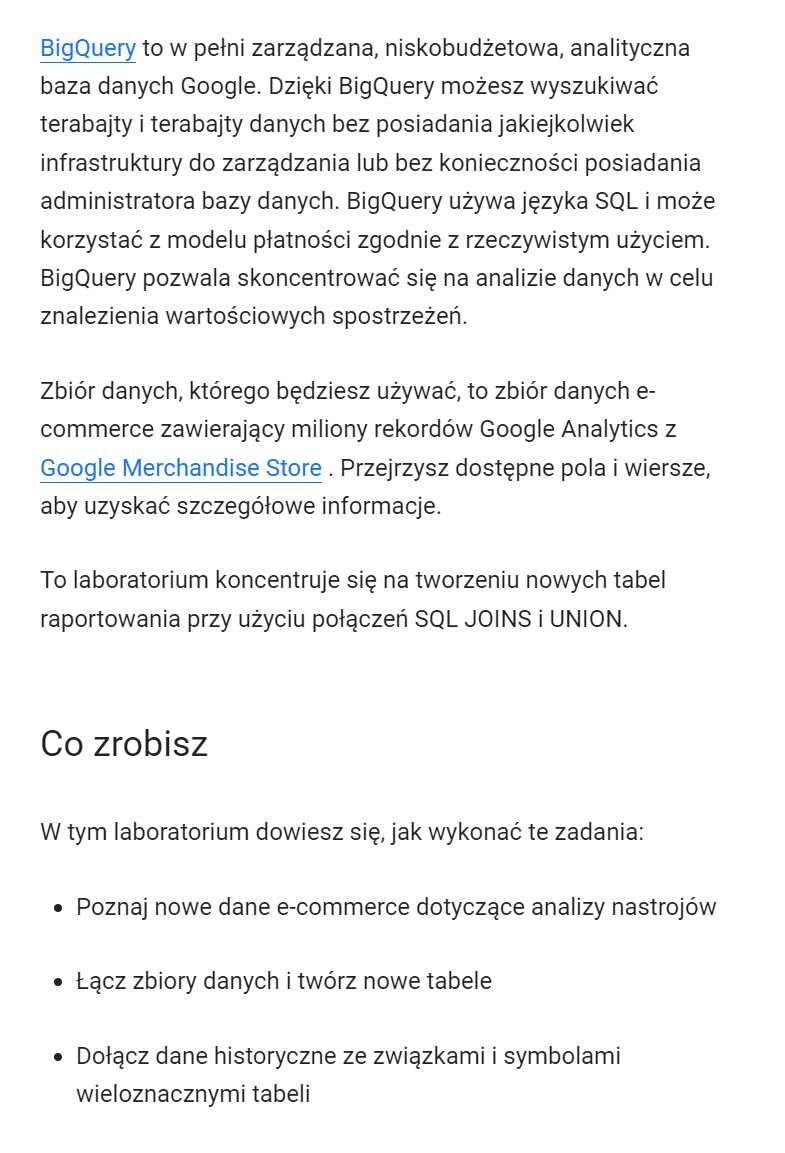

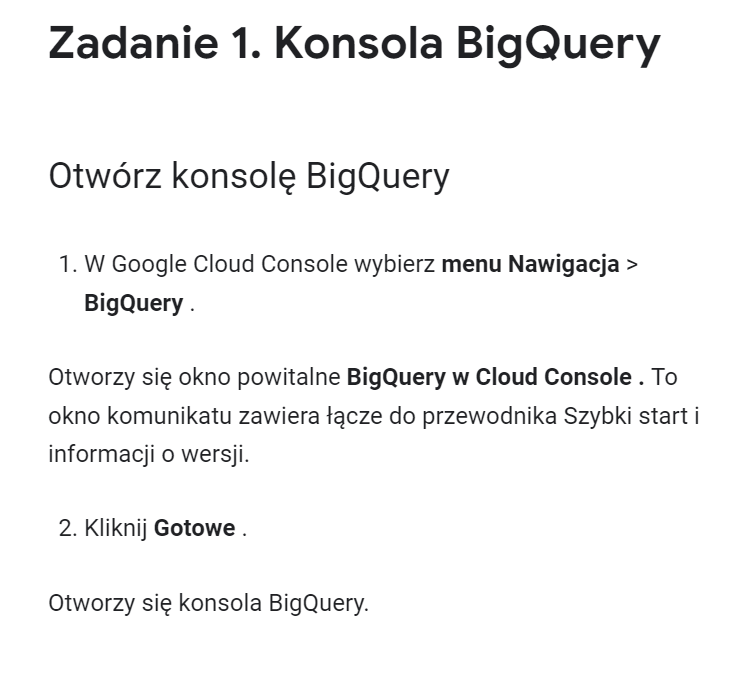

In [ ]:
# ecommerce

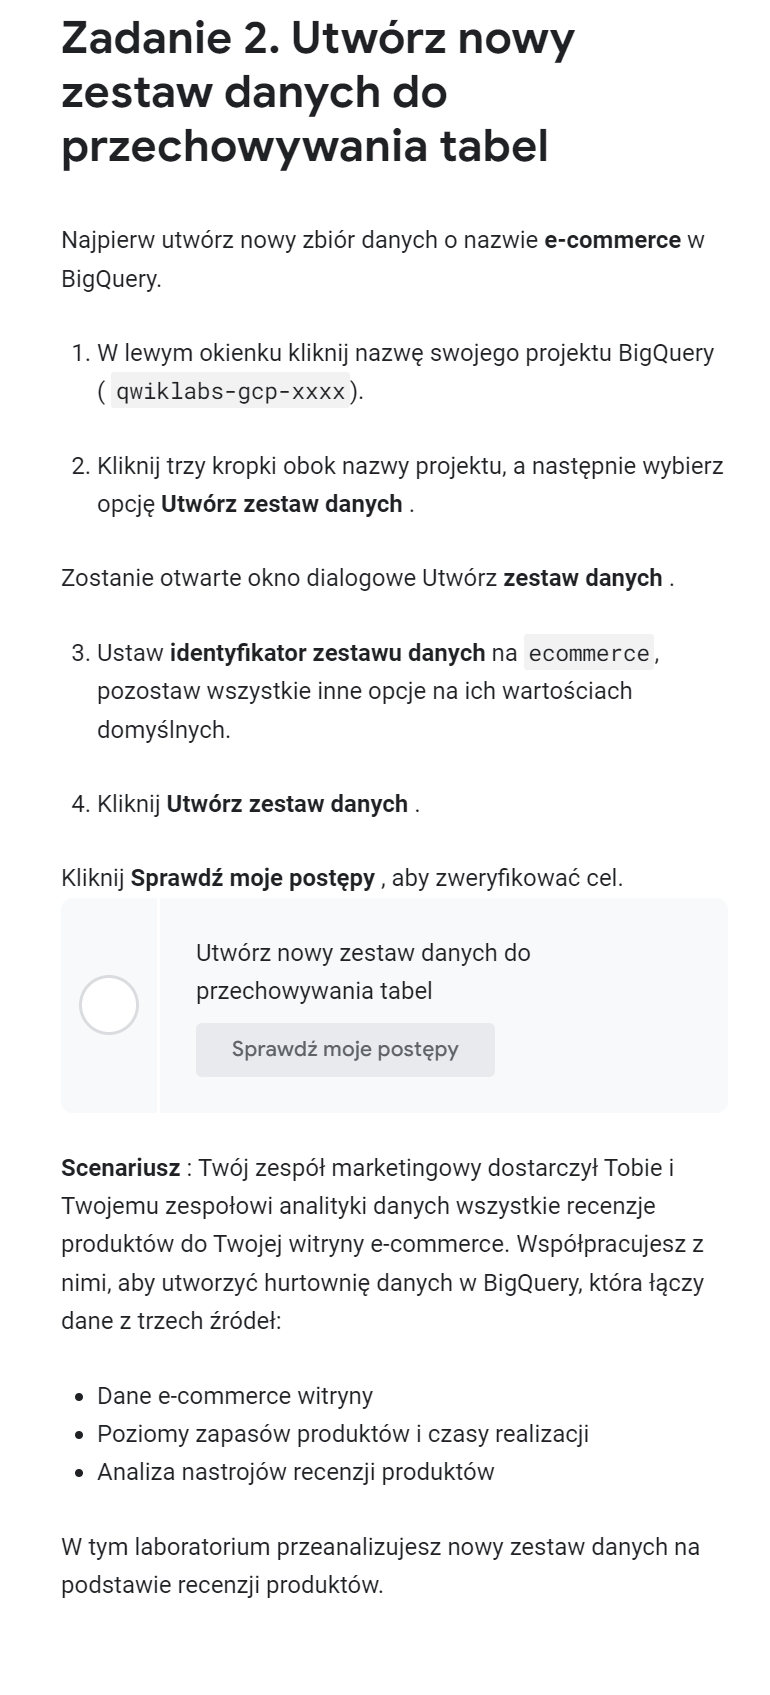

In [ ]:
# data-to-insights

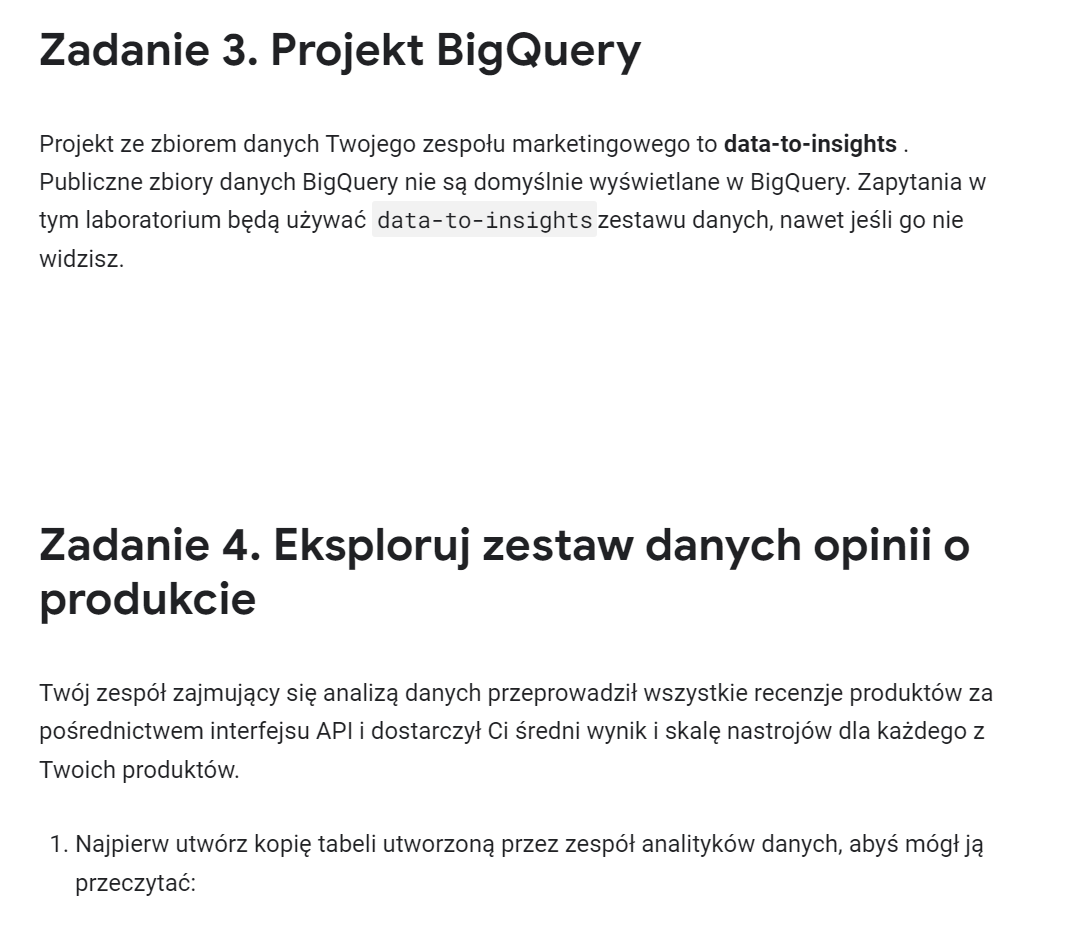

In [ ]:
%%bigquery

create or replace TABLE ecommerce.products AS
SELECT
*
FROM
`data-to-insights.ecommerce.products`

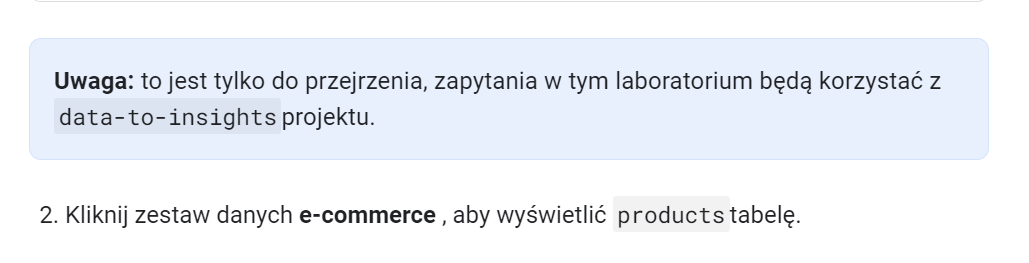

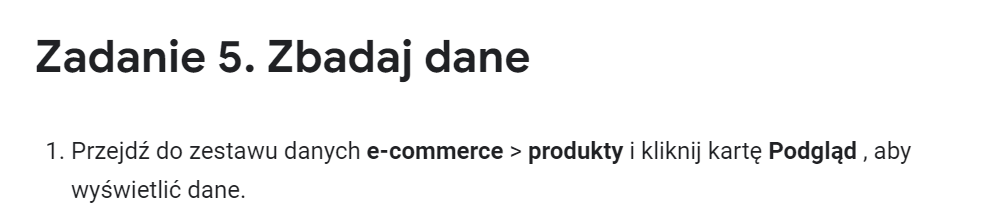

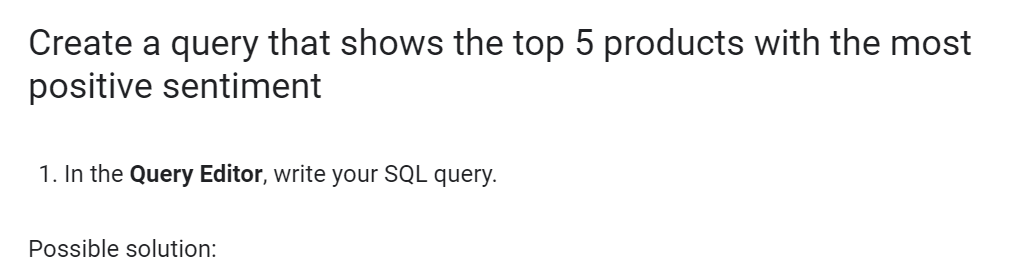

In [ ]:
%%bigquery

SELECT
  SKU,
  name,
  sentimentScore,
  sentimentMagnitude
FROM
  `data-to-insights.ecommerce.products`
ORDER BY
  sentimentScore DESC
LIMIT 5

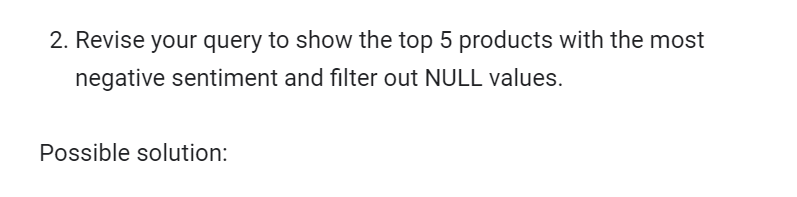

In [ ]:
%%bigquery

SELECT
  SKU,
  name,
  sentimentScore,
  sentimentMagnitude
FROM
  `data-to-insights.ecommerce.products`
WHERE sentimentScore IS NOT NULL
ORDER BY
  sentimentScore
LIMIT 5

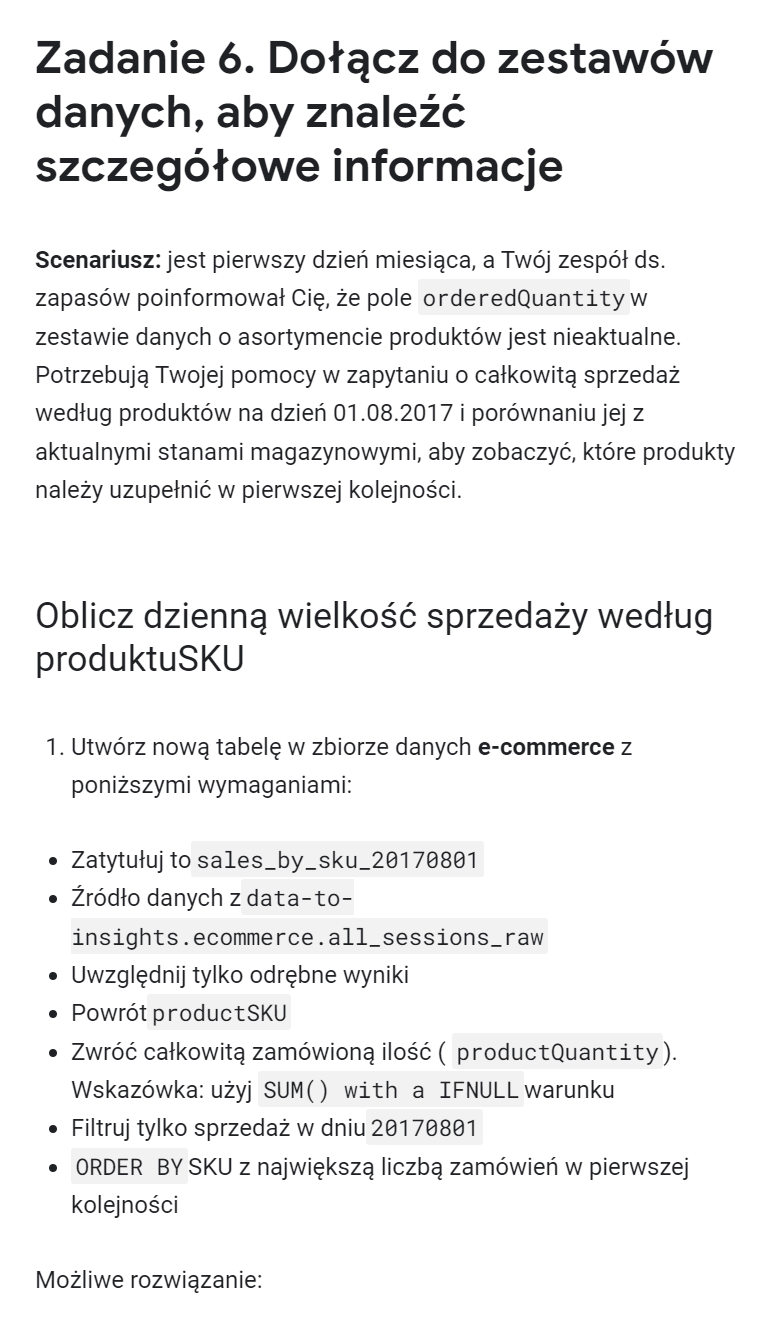

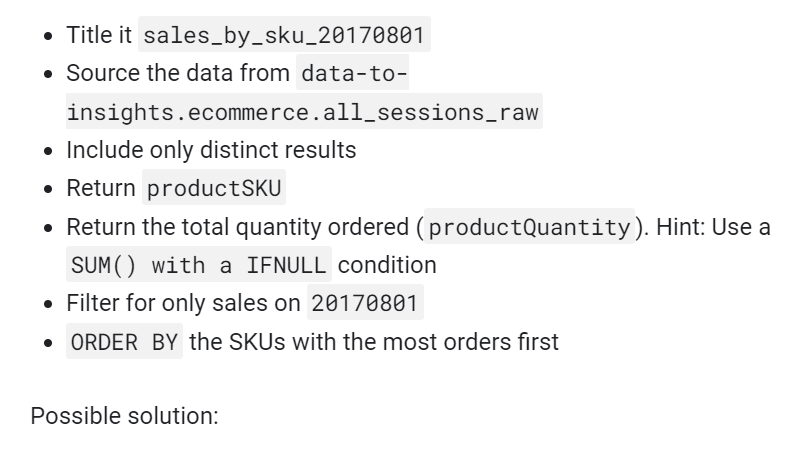

In [ ]:
%%bigquery

# pull what sold on 08/01/2017
CREATE OR REPLACE TABLE ecommerce.sales_by_sku_20170801 AS
SELECT
  productSKU,
  SUM(IFNULL(productQuantity,0)) AS total_ordered
FROM
  `data-to-insights.ecommerce.all_sessions_raw`
WHERE date = '20170801'
GROUP BY productSKU
ORDER BY total_ordered DESC #462 skus sold

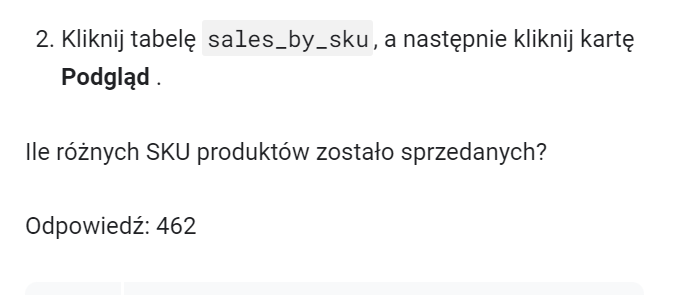

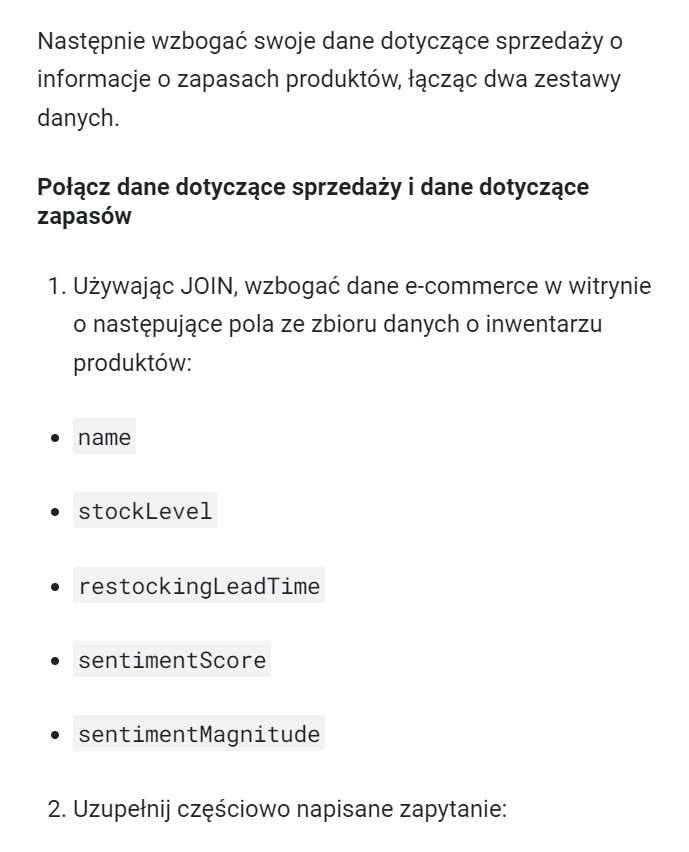

In [ ]:
%%bigquery

# join against product inventory to get name
SELECT DISTINCT
  website.productSKU,
  website.total_ordered,
  inventory.name,
  inventory.stockLevel,
  inventory.restockingLeadTime,
  inventory.sentimentScore,
  inventory.sentimentMagnitude
FROM
  ecommerce.sales_by_sku_20170801 AS website
  LEFT JOIN `data-to-insights.ecommerce.products` AS inventory
ORDER BY total_ordered DESC

In [ ]:
%%bigquery

# join against product inventory to get name
SELECT DISTINCT
  website.productSKU,
  website.total_ordered,
  inventory.name,
  inventory.stockLevel,
  inventory.restockingLeadTime,
  inventory.sentimentScore,
  inventory.sentimentMagnitude
FROM
  ecommerce.sales_by_sku_20170801 AS website
  LEFT JOIN `data-to-insights.ecommerce.products` AS inventory
  ON website.productSKU = inventory.SKU
ORDER BY total_ordered DESC

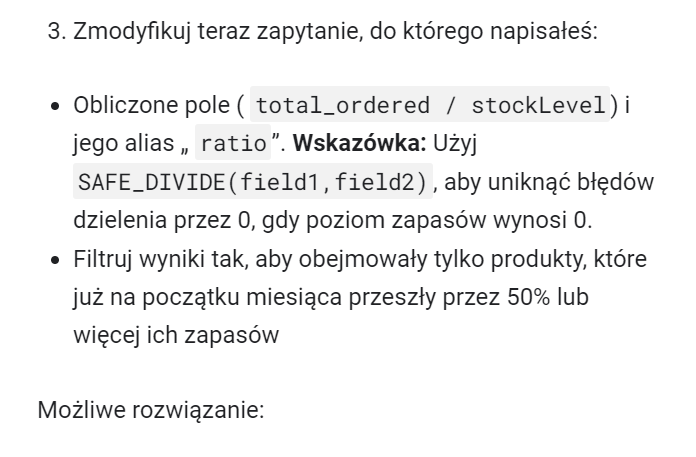

In [ ]:
%%bigquery

# calculate ratio and filter
SELECT DISTINCT
  website.productSKU,
  website.total_ordered,
  inventory.name,
  inventory.stockLevel,
  inventory.restockingLeadTime,
  inventory.sentimentScore,
  inventory.sentimentMagnitude,
  SAFE_DIVIDE(website.total_ordered, inventory.stockLevel) AS ratio
FROM
  ecommerce.sales_by_sku_20170801 AS website
  LEFT JOIN `data-to-insights.ecommerce.products` AS inventory
  ON website.productSKU = inventory.SKU
# gone through more than 50% of inventory for the month
WHERE SAFE_DIVIDE(website.total_ordered,inventory.stockLevel) >= .50
ORDER BY total_ordered DESC

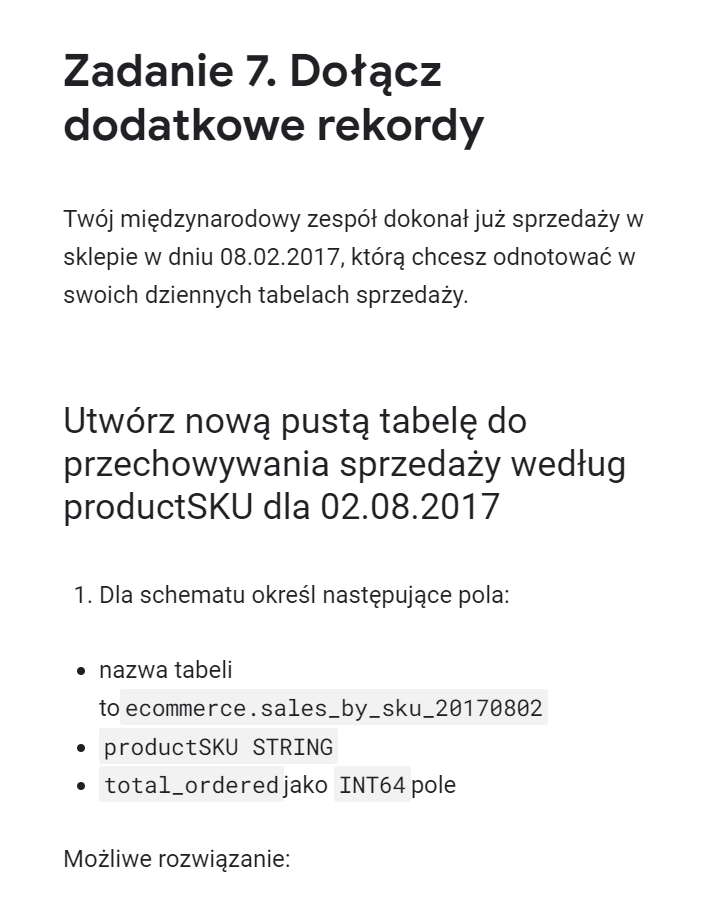

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE ecommerce.sales_by_sku_20170802
(
productSKU STRING,
total_ordered INT64
);

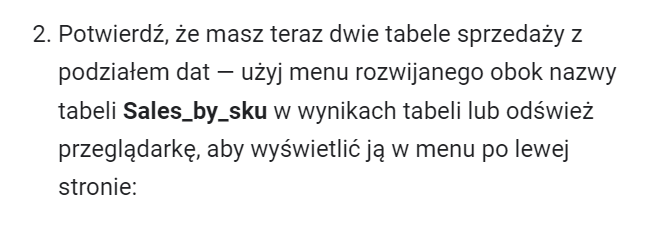

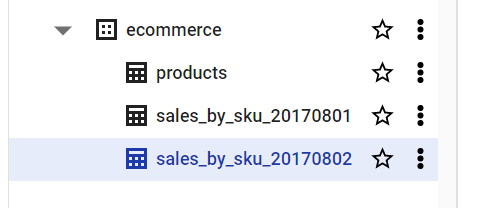

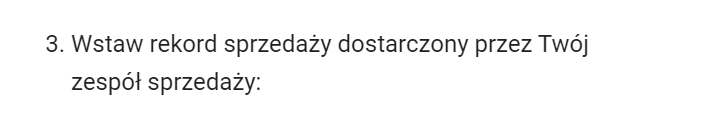

In [ ]:
%%bigquery

INSERT INTO ecommerce.sales_by_sku_20170802
(productSKU, total_ordered)
VALUES('GGOEGHPA002910', 101)

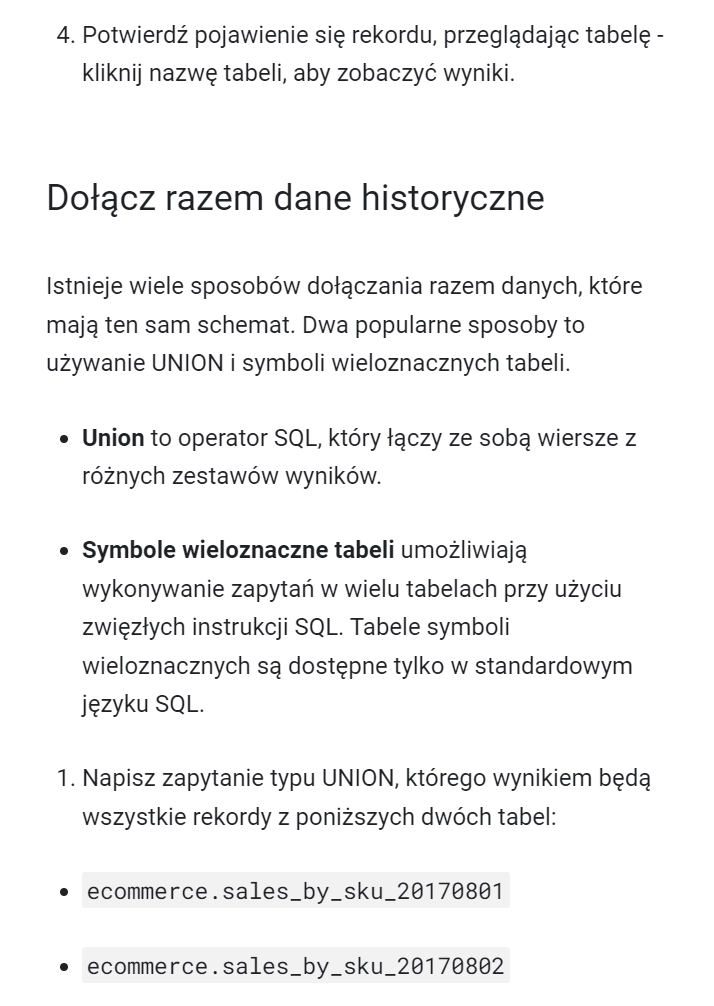

In [ ]:
%%bigquery

SELECT * FROM ecommerce.sales_by_sku_20170801
UNION ALL
SELECT * FROM ecommerce.sales_by_sku_20170802

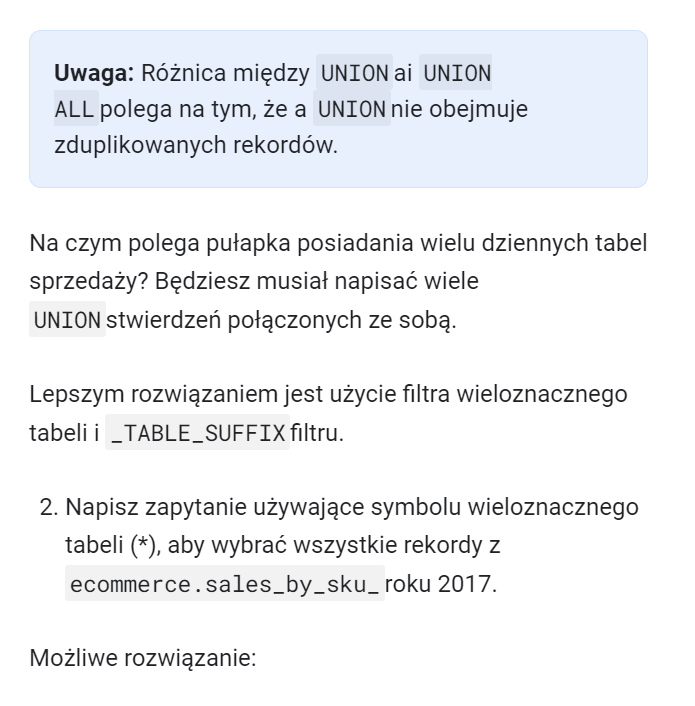

In [ ]:
%%bigquery

SELECT * FROM `ecommerce.sales_by_sku_2017*`

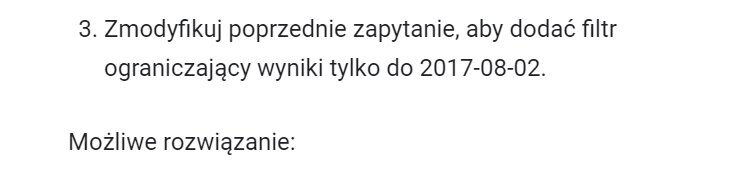

In [ ]:
%%bigquery

SELECT * FROM `ecommerce.sales_by_sku_2017*`
WHERE _TABLE_SUFFIX = '0802'

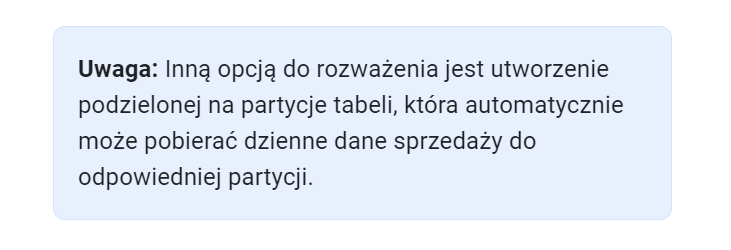